In [1]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Joining 2012-2018 datasets

In [2]:
years = [i for i in range(2012,2018+1)]
df_dictionary = {}
for year in years:
    df_dictionary[year] = pd.read_csv(f"./{year}.csv")
    df_dictionary[year]['YEAR'] = year # Add year column
    df_dictionary[year].columns = map(str.upper, df_dictionary[year].columns)
    df_dictionary[year].columns = df_dictionary[year].columns.str.replace(' ', '')

In [3]:
df = pd.concat(df_dictionary)

In [4]:
df.to_csv("./output.csv")

In [5]:
print(df_dictionary[2018].shape)
print(df.shape)

(594, 152)
(4092, 169)


# Null analysis

In [6]:
# NA columns
NA_cols = df.columns[df.isna().any()]
NA_cols

Index(['N01400', 'A01400', 'N01700', 'A01700', 'N03230', 'A03230', 'N03240',
       'A03240', 'N07220', 'A07220', 'N85530', 'A85530', 'N85300', 'A85300',
       'TOTAL_VITA', 'VITA', 'MVITA', 'TCE', 'N05780', 'A05780', 'N85770',
       'A85770', 'N85775', 'A85775', 'N09750', 'A09750', 'N11560', 'A11560',
       'VITA_EIC', 'RAL', 'RAC', 'ELDERLY', 'N17000', 'A17000', 'N18800',
       'A18800', 'N19500', 'A19500', 'N19530', 'A19530', 'N19550', 'A19550',
       'N19570', 'A19570', 'N20800', 'A20800', 'N21020', 'A21020', 'ELF',
       'CPREP', 'DIR_DEP', 'N20950', 'A20950', 'N11900', 'A11900', 'N12000',
       'A12000', 'N01750', 'A01750', 'N04450', 'A04450', 'N04100', 'A04100',
       'N04200', 'A04200', 'N18460', 'A18460', 'N04475', 'A04475', 'N07225',
       'A07225'],
      dtype='object')

In [7]:
for c in NA_cols:
    print(f'NaN analysis: {c}')
    nans_by_year = df['A01400'].isna().groupby(df['YEAR']).sum().astype(int).reset_index(name= 'NaN count')
    nans_by_year['NAN percentage'] = nans_by_year.apply(lambda x: x['NaN count']/len(df[df['YEAR'] == x['YEAR']]), axis=1)
    print(nans_by_year)

NaN analysis: N01400
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: A01400
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: N01700
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: A01700
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  201

   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: RAC
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: ELDERLY
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: N17000
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0           

   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: N04450
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: A04450
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0             0.0
2  2014          0             0.0
3  2015          0             0.0
4  2016          0             0.0
5  2017          0             0.0
6  2018        594             1.0
NaN analysis: N04100
   YEAR  NaN count  NAN percentage
0  2012          0             0.0
1  2013          0         

Columns with null values can be explained by changes introduced in reporting in 2018. Some columns were deprecated. However, this columns are not critical for our analysis so we can drop them.

# Descriptive statistics

In [8]:
# Modify this list to explore different states
st = ['FL', 'TX', 'VA', 'CA', 'MI', 'NC']

## Variable analysis for all AGI ranges

### Relevant indicators

1. N1: Number of returns
2. N04800: Number of returns with taxable income
3. A10600: Total tax payment amounts
4. A18500: Real estate taxes amount
5. A18450: State and local general sales tax amount
6. A03150: Total standard deduction amount
7. A01000: Net capital gain (less loss) amount
8. A02650: Total income amount

In [9]:
# Modify this list to explore different metrics
indicators = ['N1', 'N04800', 'A10600', 'A18500', 'A18450', 'A03150', 'A01000', 'A02650']

In [10]:
for val in indicators:
    df[val] = df[val].str.replace(',', '')
    df[val] = df[val].str.replace('*', '')
    df[val] = df[val].str.replace(' ', '')
    df[val] = pd.to_numeric(df[val], errors='coerce')

In [11]:
df_total = df[['STATE', 'YEAR', 'AGI_STUB'] + indicators]
df_total = df_total[df_total['AGI_STUB'] == 0]

In [12]:
df_total.describe()

,YEAR,AGI_STUB,N1,N04800,A10600,A18500,A18450,A03150,A01000,A02650
count,372.000000,372.0,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02,3.720000e+02
mean,2015.008065,0.0,5.617348e+06,4.301756e+06,6.511376e+07,6.631763e+06,6.092628e+05,4.751526e+05,2.624383e+07,3.862032e+08
std,2.006039,0.0,2.018156e+07,1.546098e+07,2.360005e+08,2.451468e+07,2.335587e+06,1.712885e+06,9.744915e+07,1.396420e+09
min,2012.000000,0.0,7.579000e+04,4.748000e+04,4.090840e+05,5.090000e+03,8.000000e+02,6.510000e+02,2.162610e+05,3.185179e+06
25%,2013.000000,0.0,7.395950e+05,5.664725e+05,6.804654e+06,4.522218e+05,2.796725e+04,6.936450e+04,2.619884e+06,4.603403e+07
50%,2015.000000,0.0,1.914955e+06,1.447275e+06,1.776530e+07,1.187556e+06,6.252600e+04,1.433420e+05,6.283004e+06,1.131156e+08
75%,2017.000000,0.0,3.508918e+06,2.897922e+06,4.205348e+07,4.340370e+06,1.543340e+05,3.117298e+05,1.391777e+07,2.647680e+08
max,2018.000000,0.0,1.534560e+08,1.208428e+08,1.941684e+09,2.197566e+08,1.999389e+07,1.316861e+07,9.246933e+08,1.176973e+10


<ipython-input-13-7a73ee7251a8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cor = df_total[df['STATE'] == 'US'][indicators+['YEAR']].corr()


<AxesSubplot:>

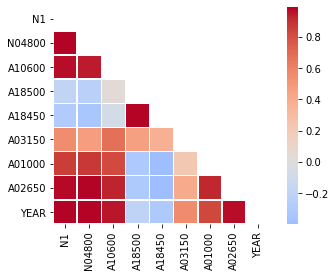

In [13]:
cor = df_total[df['STATE'] == 'US'][indicators+['YEAR']].corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, cmap="coolwarm", center=0, square=True, linewidths=.5, mask=mask)

### Key takeaways

There's no correlation between real estate taxes amount and total tax payment amounts, and state and local general sales tax amount and total tax payment amounts.
Total standard deduction also seems have a low correlation with every other indicator.
There seems to be two negatively correlated groups, that have a positive correlation within the other indicators in the same group. The first group is N1, N04800, A10600, A01000, A02650; the second group is A18500, A18450.

We therefore can simplify the number of relevant indicators for EDA purposes: A10600, A18450, A03150


In [14]:
indicators = ['A10600', 'A18450', 'A03150']

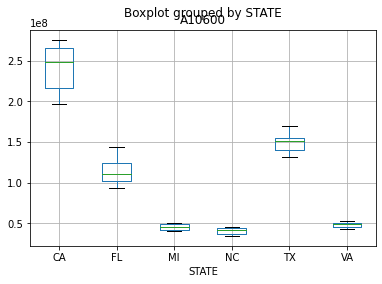

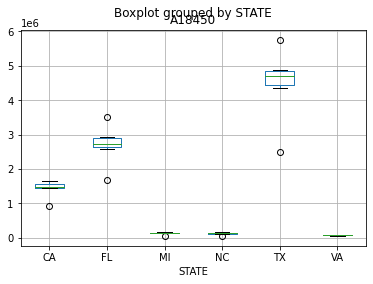

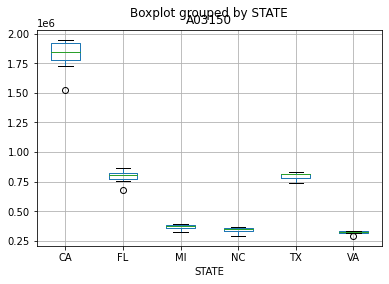

In [15]:
for v in indicators:
    df_total[df_total['STATE'].isin(st)].boxplot(v, by='STATE')
    plt.show()

## Wealth Distribution by state (Number of returns at each Adjusted Gross Income range)

AGI ranges:
```
0 = No AGI Stub
1 = ‘Under $1’
2 = '$1 under $10,000'
3 = '$10,000 under $25,000'
4 = '$25,000 under $50,000'
5 = '$50,000 under $75,000'
6 = '$75,000 under $100,000'
7 = '$100,000 under $200,000'
8 = ‘$200,000 under $500,000’
9 = ‘$500,000 under $1,000,000’
10 = ‘$1,000,000 or more’
```

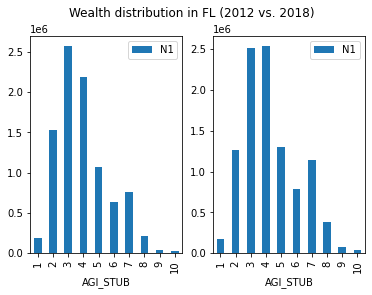

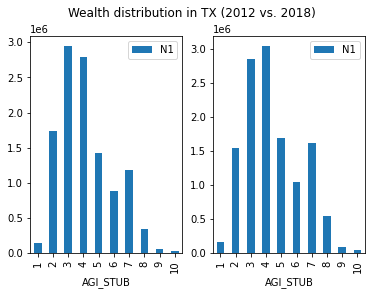

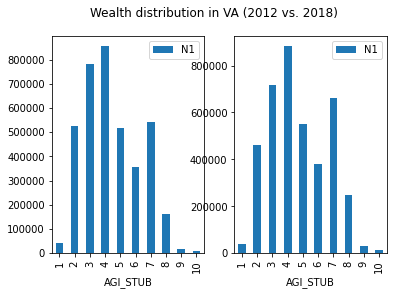

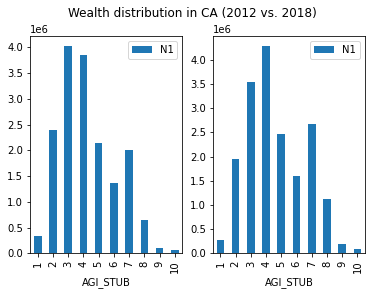

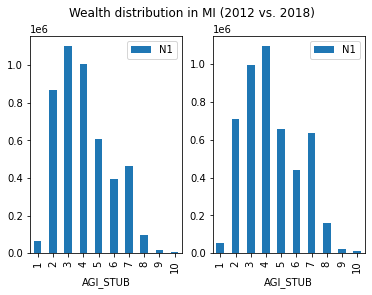

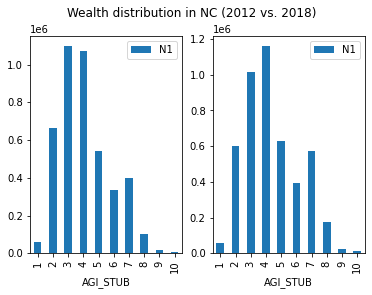

In [16]:
returns = df[['STATE', 'YEAR', 'AGI_STUB','N1']]
returns_2012 = returns[(returns['YEAR'] == 2012) & (returns['AGI_STUB'] != 0)]
returns_2018 = returns[(returns['YEAR'] == 2018) & (returns['AGI_STUB'] != 0)]
for state in st:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(f'Wealth distribution in {state} (2012 vs. 2018)')
    returns_2012[returns_2012['STATE'] == state].plot.bar('AGI_STUB','N1', ax=ax1)
    returns_2018[returns_2018['STATE'] == state].plot.bar('AGI_STUB','N1', ax=ax2)

## Next steps:
- Introduce per capita amounts, by joining with population dataset. This will allows us to compare states.
- Descriptive statistics at each AGI range.
- Join with migration and RPP dataset to compute correlations.